In [ ]:
import pandas as pd

In [ ]:
passageiros = pd.read_csv('Passageiros.csv')

In [ ]:
passageiros.head()

,tempo,nPassageiros
0,1949.000000,112
1,1949.083333,118
2,1949.166667,132
3,1949.250000,129
4,1949.333333,121


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


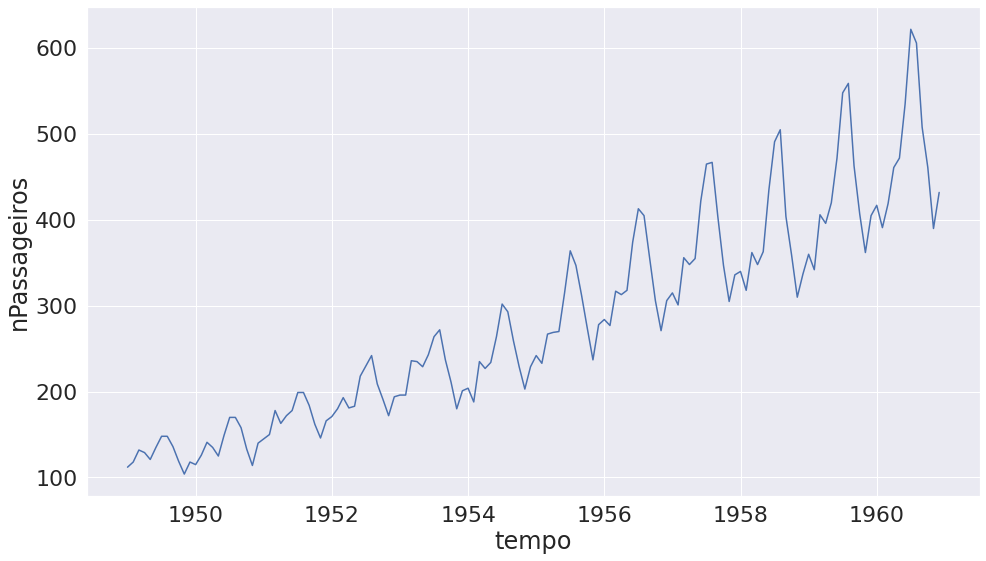

In [ ]:
plt.figure(figsize = (16,9))
sns.set(font_scale=2)
sns.lineplot(x="tempo", y="nPassageiros", data=passageiros)

In [ ]:
#Seleciona todas as colunas menos a última
Tempo = passageiros.iloc[:,:-1].values

In [ ]:
nPassageiros = passageiros.iloc[:,1].values

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
Tempo_treino, Tempo_teste, nPassageiros_treino, nPassageiros_teste = train_test_split(Tempo, nPassageiros, 
                                                                                      test_size = 0.3)

In [ ]:
from sklearn import linear_model

In [ ]:
regressor = linear_model.LinearRegression()

In [ ]:
#Ajustando a reta aos dados de treino
regressor.fit(Tempo_treino,nPassageiros_treino)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
nPassageiros_predito = regressor.predict(Tempo_teste)

In [ ]:
import numpy as np

In [ ]:
#Colocando os dados em um data frame para posteriormente gerar uma figura com o 
# Seaborn
passageiros_predito = pd.DataFrame({'Tempo': np.ndarray.flatten(Tempo_teste),
                                    'nPassageiros': nPassageiros_predito,
             })
passageiros_teste = pd.DataFrame({'Tempo': np.ndarray.flatten(Tempo_teste),
                                    'nPassageiros': nPassageiros_teste,
             })


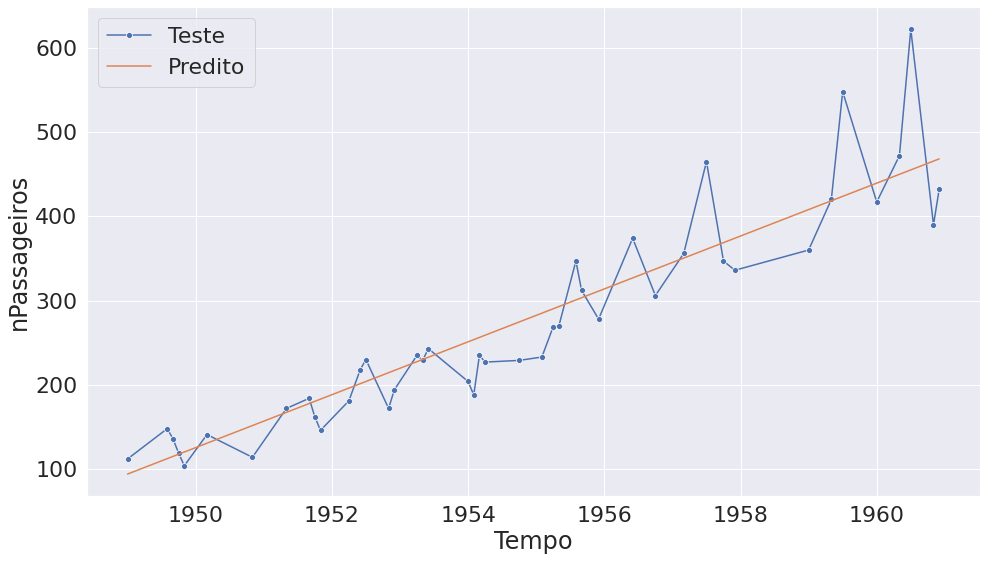

In [ ]:
plt.figure(figsize = (16,9))
sns.set(font_scale=2)
sns.lineplot(x="Tempo", y="nPassageiros", data = passageiros_teste,  marker='o', label = "Teste")
sns.lineplot(x='Tempo', y='nPassageiros', data = passageiros_predito, label = "Predito" )

In [ ]:
regressor.coef_
#coeficiente angular do ax+b

array([31.39220715])

In [ ]:
regressor.intercept_
#coeficiente linear

-61089.31170700813

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
# e1 = (y1-(ax1+b))²
# ErroTotal = (y1-(ax1+b))² + (y2-(ax2+b))² + ... +  (yn-(axn+b))²

#R2 mede o ajuste da reta
r2_score(nPassageiros_teste, nPassageiros_predito)

0.8528431359331883

In [ ]:
#suport vector machine

from sklearn.svm import SVR

regressor_svr = SVR(C=9999999)  #C tira o ruído
regressor_svr.fit(Tempo_treino, nPassageiros_treino)

SVR(C=9999999, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:
nPassageiros_predito_svr = regressor_svr.predict(Tempo_teste)

In [ ]:
passageiros_predito_svr = pd.DataFrame({'Tempo': np.ndarray.flatten(Tempo_teste),
                                    'nPassageiros': nPassageiros_predito_svr,
             })

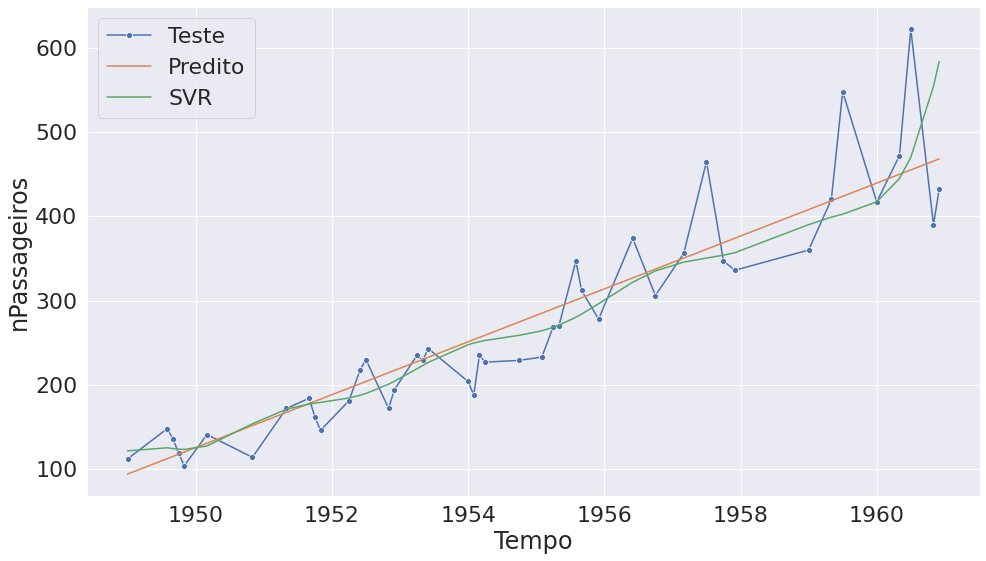

In [ ]:
plt.figure(figsize = (16,9))
sns.set(font_scale=2)
sns.lineplot(x="Tempo", y="nPassageiros", data = passageiros_teste,  marker='o', label = "Teste")
sns.lineplot(x='Tempo', y='nPassageiros', data = passageiros_predito, label = "Predito" )
sns.lineplot(x='Tempo', y='nPassageiros', data = passageiros_predito_svr, label = "SVR" )

In [ ]:
r2_score(nPassageiros_teste, nPassageiros_predito_svr)

0.8318835019356905